In [2]:
# Imports:
import numpy as np

In [3]:
a = np.array([0], np.int16)
a.itemsize


2

In [1]:
from scipy import misc
img = misc.face()


In [2]:
type(img)


numpy.ndarray

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline


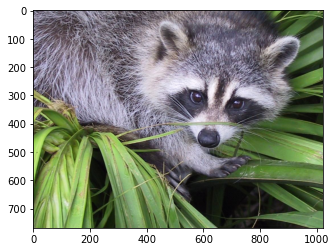

In [4]:
plt.imshow(img)
plt.show()


In [6]:
img.shape

(768, 1024, 3)

In [7]:
img.ndim


3

In [8]:
img[:,:,0]


array([[121, 138, 153, ..., 119, 131, 139],
       [ 89, 110, 130, ..., 118, 134, 146],
       [ 73,  94, 115, ..., 117, 133, 144],
       ...,
       [ 87,  94, 107, ..., 120, 119, 119],
       [ 85,  95, 112, ..., 121, 120, 120],
       [ 85,  97, 111, ..., 120, 119, 118]], dtype=uint8)

In [9]:
img[:,:,0].shape

(768, 1024)

In [10]:
img_array = img / 255

In [11]:
img_array.max(), img_array.min()

(1.0, 0.0)

In [12]:
img_array.dtype

dtype('float64')

In [13]:
red_array = img_array[:,:,0]
green_array = img_array[:,:,1]
blue_array = img_array[:,:,2]

In [14]:
from numpy import linalg

In [15]:
img_gray = img_array@[0.2126, 0.7156, 0.0722]

In [16]:
img_gray.shape

(768, 1024)

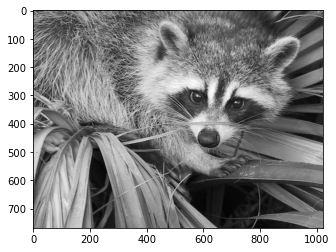

In [17]:
plt.imshow(img_gray, cmap="gray")
plt.show()

In [19]:
img_gray[:,:]

array([[0.45227451, 0.51896784, 0.57838118, ..., 0.47375608, 0.51408863,
        0.54547373],
       [0.3326298 , 0.41501569, 0.49123843, ..., 0.46926667, 0.53203686,
        0.57911451],
       [0.26985961, 0.35224549, 0.43463137, ..., 0.47123922, 0.53400941,
        0.57716392],
       ...,
       [0.39151765, 0.40999451, 0.46323529, ..., 0.57090275, 0.56697961,
        0.56950275],
       [0.37468627, 0.41391765, 0.47695529, ..., 0.56864706, 0.56444078,
        0.56444078],
       [0.37525255, 0.42176392, 0.47359843, ..., 0.56472392, 0.56051765,
        0.55659451]])

In [25]:
U, s, Vt = linalg.svd(img_gray)

In [26]:
U.shape, s.shape, Vt.shape

((768, 768), (768,), (1024, 1024))

In [27]:
s@Vt

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1024 is different from 768)

In [28]:
import numpy as np

Sigma = np.zeros((U.shape[1], Vt.shape[0]))
np.fill_diagonal(Sigma, s)

In [29]:
linalg.norm(img_gray - U@Sigma@Vt)

1.3828123547753979e-12

In [31]:
np.allclose(img_gray, U@Sigma@Vt)

True

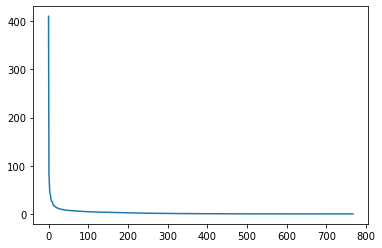

In [32]:
plt.plot(s)
plt.show()

In [33]:
k = 10

In [34]:
approx = U @ Sigma[:, :k] @ Vt[:k, :]

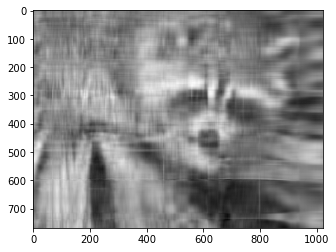

In [35]:
plt.imshow(approx, cmap="gray")
plt.show()


In [36]:
img_array.shape

(768, 1024, 3)

In [37]:
np.transpose(x, axes=(i,j,k))

NameError: name 'x' is not defined

In [38]:
img_array_transposed = np.transpose(img_array, (2, 0, 1))
img_array_transposed.shape

(3, 768, 1024)

In [39]:
U, s, Vt = linalg.svd(img_array_transposed)

In [40]:
U.shape, s.shape, Vt.shape

((3, 768, 768), (3, 768), (3, 1024, 1024))

In [41]:
Sigma = np.zeros((3, 768, 1024))
for j in range(3):
    np.fill_diagonal(Sigma[j, :, :], s[j, :])

In [42]:
reconstructed = U @ Sigma @ Vt

In [43]:
reconstructed.shape

(3, 768, 1024)

In [44]:
reconstructed.min(), reconstructed.max()

(-4.941576661754432e-15, 1.0000000000000038)

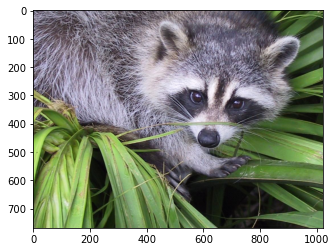

In [45]:
reconstructed = np.clip(reconstructed, 0, 1)
plt.imshow(np.transpose(reconstructed, (1, 2, 0)))
plt.show()